**Data Introduction:**

 There are ten different categories of photos in the CIFAR-10 Dataset, including airplane, car, bird, cat, deer, dog, frog, horse, ship, and truck. A total of 60,000 photos, each measuring 32x32 pixels, make up the collection. Out of these, 50,000 images are used for training and 10,000 images for testing purposes.

In [4]:
# Importing Dependencies 
import numpy as np


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch1 = unpickle("C:/Users/Admin/Downloads/cifar-10-batches-py/data_batch_1")
batch2 = unpickle("C:/Users/Admin/Downloads/cifar-10-batches-py/data_batch_2")
batch3 = unpickle("C:/Users/Admin/Downloads/cifar-10-batches-py/data_batch_3")
batch4 = unpickle("C:/Users/Admin/Downloads/cifar-10-batches-py/data_batch_4")
batch5 = unpickle("C:/Users/Admin/Downloads/cifar-10-batches-py/data_batch_5")
test_batch = unpickle("C:/Users/Admin/Downloads/cifar-10-batches-py/test_batch")


def load_data0(btch):
    labels = btch[b'labels']
    imgs = btch[b'data'].reshape((-1, 32, 32, 3))
    
    res = []
    for ii in range(imgs.shape[0]):
        img = imgs[ii].copy()
        img = np.fliplr(np.rot90(np.transpose(img.flatten().reshape(3,32,32)), k=-1))
        res.append(img)
    imgs = np.stack(res)
    return labels, imgs


def load_data():
    x_train_l = []
    y_train_l = []
    for ibatch in [batch1, batch2, batch3, batch4, batch5]:
        labels, imgs = load_data0(ibatch)
        x_train_l.append(imgs)
        y_train_l.extend(labels)
    x_train = np.vstack(x_train_l)
    y_train = np.vstack(y_train_l)
    
    x_test_l = []
    y_test_l = []
    labels, imgs = load_data0(test_batch)
    x_test_l.append(imgs)
    y_test_l.extend(labels)
    x_test = np.vstack(x_test_l)
    y_test = np.vstack(y_test_l)
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
del batch1, batch2, batch3, batch4, batch5, test_batch

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
import tensorflow as tf 

In [6]:
# To import necessary packages
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [7]:
# To reduce the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# To flatten the values and convert them to one-dimensional array
y_train, y_test = y_train.flatten(), y_test.flatten()

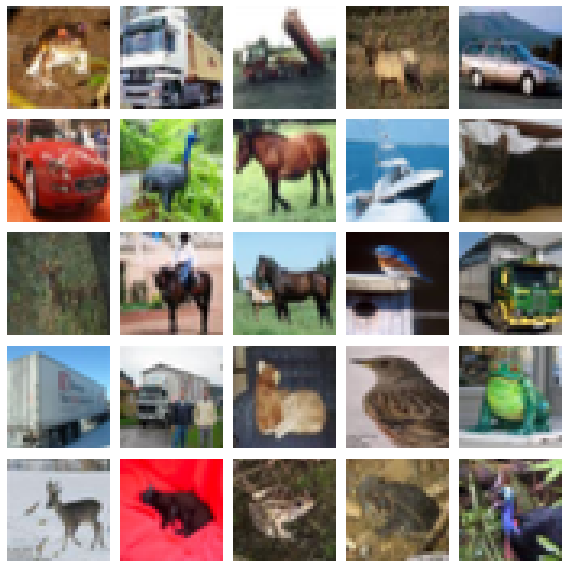

In [9]:
# To create and visualize a grid of subplots with a 5x5 layout
# Set figsize to adjust the size of the grid
fig, ax = plt.subplots(5, 5, figsize=(8, 8)) 
temp_variable = 0

for variable_i in range(5):
    for variable_j in range(5):
        ax[variable_i][variable_j].imshow(x_train[temp_variable], aspect='auto')
        # Turn off axis ticks and labels for a cleaner look
        ax[variable_i][variable_j].axis('off')  
        temp_variable += 1
 
plt.tight_layout()  # Add tight layout to adjust spacing between subplots
plt.show()

**Convolutional Neural Network:**

**Introduction:**

Convolutional neural network (CNN) is a type of deep neural network in deep learning that was primarily used for image analysis and recognition. CNN employ a unique technique called as convolution.

CNN are made up of several artificial neuronal layers. Each of a CNN's inner layers produces different activation maps when we feed it an input image. Typically, the first (or bottom) layer of a CNN algorithm can identify the various properties of an input image, such as edges that run horizontally, vertically, or diagonally. The second layer extracts more complex elements from the input image, such as corners and edge combinations, using the output of the first layer as an input.As we delve deeper into a convolutional neural network, the successive layers gradually learn to detect more complex and higher-level features from the input data.

The CNN is made up of three kinds of layers: 
1. Convolutional layers : Responsible for extracting various features from the input images.
2. pooling layers : To downsize or reduce the spatial dimensions of the convolved features.
3. fully-connected (FC) layers : Facilitates the connection between neurons from different layers in the network.

Additionally, a dropout layer is used, in which a few neurons are eliminated from the neural network during the training phase, resulting in a smaller model, to avoid overfitting

Furtherly, batch normalisation function is used to normalize the inputs of a layer by normalizing the values with in the mini-batches during training to accelerate convergence.


In [10]:

# Number of output classes
output_length = len(set(y_train))
 
# To calculate and see the number of classes
print("number of classes:", output_length)
 
# Building the neural Network
# To retrieve and get the shape of the input
input_shape = Input(shape=x_train[0].shape)

# To add two 2D convolutional layers with 32 filters with 3*3 kernel size, activation function as ReLu and  padding
# Performing batch normalization of the layers, and a max pooling layer to the neural network.
layer = Conv2D(32, (3, 3), activation='relu', padding='same')(input_shape)
layer = BatchNormalization()(layer)
layer = Conv2D(32, (3, 3), activation='relu', padding='same')(layer)
layer = BatchNormalization()(layer)
layer = MaxPooling2D((2, 2))(layer)
 
# To add two 2D convolutional layers with 64 filters with 3*3 kernel size, activation function as ReLu and padding
# Performing batch normalization of the layers, and a max pooling layer to the neural network.
layer = Conv2D(64, (3, 3), activation='relu', padding='same')(layer)
layer = BatchNormalization()(layer)
layer = Conv2D(64, (3, 3), activation='relu', padding='same')(layer)
layer = BatchNormalization()(layer)
layer = MaxPooling2D((2, 2))(layer)
 
# To add two 2D convolutional layers with 128 filters with 3*3 kernel size, activation function as ReLu and padding
# Performing batch normalization of the layers, and a max pooling layer to the neural network.
layer = Conv2D(128, (3, 3), activation='relu', padding='same')(layer)
layer = BatchNormalization()(layer)
layer = Conv2D(128, (3, 3), activation='relu', padding='same')(layer)
layer = BatchNormalization()(layer)
layer = MaxPooling2D((2, 2))(layer)

# TO convert 2D feature to 1D vector
layer = Flatten()(layer)

# Dropout rate for regularization during training
layer = Dropout(0.2)(layer)
 
#  To add two fully connected layers with ReLU activation function  
layer = Dense(1024, activation='relu')(layer)
layer = Dense(512, activation='relu')(layer)

# dropout layer with a dropout rate of 0.2
layer = Dropout(0.2)(layer)
 
# Output layer or the last hidden layer
layer = Dense(output_length, activation='softmax')(layer)
 
model = Model(input_shape, layer)
 
# To retreive the model summary
model.summary()

number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16

In [11]:
# To  configure the training process of a neural network model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
#  To train a neural network model on labeled data
cnn = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 261s 166ms/step - loss: 1.3156 - accuracy: 0.5460 - val_loss: 1.2000 - val_accuracy: 0.5877
Epoch 2/50
1563/1563 [==============================] - 259s 166ms/step - loss: 0.8418 - accuracy: 0.7080 - val_loss: 0.8321 - val_accuracy: 0.7128
Epoch 3/50
1563/1563 [==============================] - 261s 167ms/step - loss: 0.6895 - accuracy: 0.7648 - val_loss: 0.7464 - val_accuracy: 0.7476
Epoch 4/50
1563/1563 [==============================] - 267s 171ms/step - loss: 0.5815 - accuracy: 0.8005 - val_loss: 0.6275 - val_accuracy: 0.7869
Epoch 5/50
1563/1563 [==============================] - 267s 171ms/step - loss: 0.4835 - accuracy: 0.8343 - val_loss: 0.6334 - val_accuracy: 0.7863
Epoch 6/50
1563/1563 [==============================] - 283s 181ms/step - loss: 0.4086 - accuracy: 0.8584 - val_loss: 0.6917 - val_accuracy: 0.7795
Epoch 7/50
1563/1563 [==============================] - 296s 190ms/step - loss: 0.3520 - accuracy: 0.8792 - val_

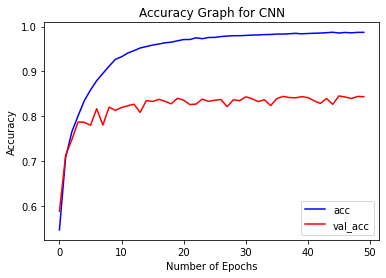

In [13]:

# Plotting the number of epochs with respect to accuracy of the train set and validation set 
plt.plot(cnn.history['accuracy'], label='acc', color='blue')
plt.plot(cnn.history['val_accuracy'], label='val_acc', color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Graph for CNN")
plt.legend()

**Observations:** 

As the size of epochs increases, the accuracy on the train data set gradually increased and at the 50th epoch, the train set accuracy is approximately 98%. It is also observed that the validation set accuracy is slowly increasing and the approximately at 8th epoch, the accuracy is fluctuatating and almost stabilised from then. Finally, for the 50th epoch, the accuracy on the validation data set is 84%.

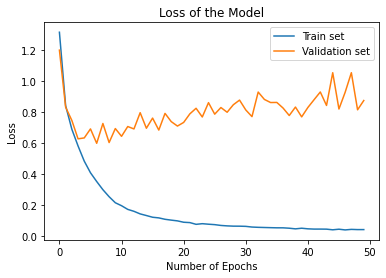

In [14]:
# Plotting the number of epochs with respect to loss of the train set and validation set 
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Train set', 'Validation set'], loc='upper right')
plt.show()

**Observations:**

As the number of epochs increased, the loss for the train data set significantly decreased and the loss for validation set is flucatuating and at it's peak at approximately at 44th epoch. At the 50th epoch, the loss is approximately 0.04.

In [15]:

# Image data generator to augment the training data with random transformations
# Trains the model using the augmented data in batches of size 32 for 50 epochs
batch_size = 32
image_augmentator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
# To generates augmented batches of data during training
train_augmentator = image_augmentator.flow(x_train, y_train, batch_size)
size_of_epoch = x_train.shape[0] // batch_size
 
# TO train the model
cnn_model = model.fit(train_augmentator, validation_data=(x_test, y_test),
              steps_per_epoch=size_of_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 247s 158ms/step - loss: 0.5386 - accuracy: 0.8305 - val_loss: 0.5024 - val_accuracy: 0.8403
Epoch 2/50
1562/1562 [==============================] - 249s 159ms/step - loss: 0.4313 - accuracy: 0.8585 - val_loss: 0.4845 - val_accuracy: 0.8428
Epoch 3/50
1562/1562 [==============================] - 247s 158ms/step - loss: 0.3970 - accuracy: 0.8681 - val_loss: 0.4401 - val_accuracy: 0.8565
Epoch 4/50
1562/1562 [==============================] - 259s 166ms/step - loss: 0.3744 - accuracy: 0.8754 - val_loss: 0.4621 - val_accuracy: 0.8453
Epoch 5/50
1562/1562 [==============================] - 247s 158ms/step - loss: 0.3621 - accuracy: 0.8800 - val_loss: 0.4523 - val_accuracy: 0.8532
Epoch 6/50
1562/1562 [==============================] - 253s 162ms/step - loss: 0.3465 - accuracy: 0.8852 - val_loss: 0.4466 - val_accuracy: 0.8541
Epoch 7/50
1562/1562 [==============================] - 239s 153ms/step - loss: 0.3323 - accuracy: 0.8884 - val_

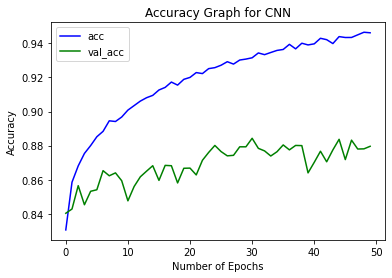

In [16]:
# Plotting the number of epochs with respect to accuracy of the train set and validation set 
plt.plot(cnn_model.history['accuracy'], label='acc', color='blue')
plt.plot(cnn_model.history['val_accuracy'], label='val_acc', color='green')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Graph for CNN")
plt.legend()
plt.legend()

**Observations:** 

As the number of epochs increases, the accuracy on the train set gradually increased and at the 50th epoch, the train set accuracy is approximately 94%. It is also observed that the accuracy is slowly increasing and the approximately at 9th epoch, the train set accuracy is slightly fluctuating. For the validation set, for the 50th epoch, the accuracy on the is 87%. Overall, the validation accuracy slightly increased after the data has been augmentated.

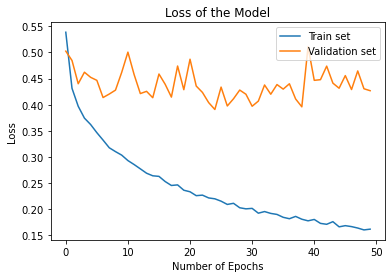

In [17]:
# Plotting the number of epochs with respect to loss of the train set and validation set
plt.plot(cnn_model.history['loss'])
plt.plot(cnn_model.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Train set', 'Validation set'], loc='upper right')
plt.show()

**Observations:**

As the quantity of the epochs increased, the loss for the train data set has significantly decreased and the loss for validation set is flucatuating and at it's lowest at approximately at 37th epoch. At the 50th epoch, the train set loss is approximately 0.16.

Original target label is automobile and predicted label is automobile


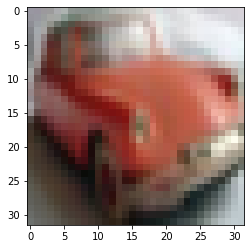

In [18]:
# Mapping the target labels of the dataset
 
output_labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()
 
# TO selecting the image from the dataset
image_to_predict = 677
 
# To display the image to the output
plt.imshow(x_test[image_to_predict])
 
# Loading the image
img_array = np.array(x_test[image_to_predict])
 
# Reshaping the array
image_reshape = img_array.reshape(1, 32, 32, 3)
 
# Inputting the image to the model and retrievig the predicted output
predicted_output = output_labels[model.predict(image_reshape).argmax()]
 
# loading the original labels of the dataset
actual_output = output_labels[y_test[image_to_predict]]
 
# Printing the output result
print("Original target label is {} and predicted label is {}".format(
    actual_output, predicted_output))

In [19]:

# save the model
model.save('img_classification_with_cnn.h5')



**SVM Introduction**:

Support Vector Machine (SVM) is a supervised machine learning technique commonly employed for solving classification and regression problems. While SVM is well-suited for linearly separable data, it is also capable of handling data that is not linearly separable by employing kernel functions. These kernel functions transform the input data into a higher-dimensional feature space, where the data becomes linearly separable, thus enabling SVM to make precise predictions on intricate data distributions. In SVM, a hyperplane is used to separate two classes of data in the feature space. The hyperplane is selected in a manner that maximizes the margin, which is defined as the distance between the hyperplane and the closest data points from each class, often referred to as support vectors. SVM, being a binary classification algorithm, operates by identifying and optimizing the hyperplane that best separates the data points into distinct classes.

**SVM - RBF kernel Introduction:**

The Radial Basis Function (RBF) kernel is a kernel function used in Support Vector Machines (SVM) for handling non-linear data. The RBF kernel is also known as the Gaussian kernel due to its similarity to the Gaussian probability density function.
The RBF kernel transforms the input data into a higher-dimensional feature space, where the data points are projected as points in an infinite-dimensional space. This transformation allows SVM to capture non-linear relationships between data points that may not be linearly separable in the original feature space.


In [21]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [22]:
# TO convert the colored images to gray scale for modelling
x_train_svm = np.dot(x_train, [0.2989, 0.5870, 0.1140])
x_test_svm = np.dot(x_test, [0.2989, 0.5870, 0.1140])

In [23]:
#To reshape the train data set 
x_train_svm = x_train_svm.reshape(x_train_svm.shape[0], -1)
x_test_svm = x_test_svm.reshape(x_test_svm.shape[0], -1)

In [25]:
svm_kernel = SVC(kernel='rbf', random_state=42)
svm_kernel.fit(x_train_svm, y_train)

SVC(random_state=42)

In [26]:
# TO get the accuracy of the SVM model with rbf krnel
y_pred_svm_rbf_kernel = svm_kernel.predict(x_test_svm)
accuracy_svm_rbf_kernel =accuracy_score(y_test, y_pred_svm_rbf_kernel)
print(f"Accuracy of SVM (rbf kenel) : {accuracy_svm_rbf_kernel}")

Accuracy of SVM (rbf kenel) : 0.4497


In [27]:
#To print the confusion matrix of the model 
confusion_matrix_svm_rbf_kernel = confusion_matrix(y_test, y_pred_svm_rbf_kernel)
print(confusion_matrix_svm_rbf_kernel)

[[420  37 105  22 103  13  53  32 155  60]
 [ 27 541  13  37  21  20  55  32  80 174]
 [ 73  26 329  96 184  57 132  41  44  18]
 [ 49  41  87 278 105 141 141  55  34  69]
 [ 57  28 165  57 414  47 110  52  50  20]
 [ 41  18 102 161  83 379  83  71  27  35]
 [ 38  38  93  65 102  53 526  18  36  31]
 [ 44  27  63  71  98  64  48 466  46  73]
 [ 88  79  27  36  41  21  27  30 591  60]
 [ 31 160  26  35  17  16  38  43  81 553]]


In [28]:
# To generate the classification report for the SVM moddel with rbf kernel
classification_report_svm_rbf_kernel = classification_report(y_test, y_pred_svm_rbf_kernel)
print(classification_report_svm_rbf_kernel)

              precision    recall  f1-score   support

           0       0.48      0.42      0.45      1000
           1       0.54      0.54      0.54      1000
           2       0.33      0.33      0.33      1000
           3       0.32      0.28      0.30      1000
           4       0.35      0.41      0.38      1000
           5       0.47      0.38      0.42      1000
           6       0.43      0.53      0.48      1000
           7       0.55      0.47      0.51      1000
           8       0.52      0.59      0.55      1000
           9       0.51      0.55      0.53      1000

    accuracy                           0.45     10000
   macro avg       0.45      0.45      0.45     10000
weighted avg       0.45      0.45      0.45     10000



**Observations for SVM - rbf kernel:**

The weighted average for precision, recall, and F1-score is 0.45, indicating the average performance of the model across all classes while considering class imbalance. Overall, the analysis from the classification report indicates that the model's performance is moderate, with varying precision, recall, and F1-score for different classes. Further optimization and fine-tuning of the model may be required to improve its performance on specific classes with lower precision, recall, and F1-score.

**SVM - Polynomial kernel Introduction**

The Polynomial (Poly) kernel is another  kernel function used in SVM for handling non-linear data. The Poly kernel allows SVM to capture non-linear relationships between data points by projecting them into a higher dimensional space of the feature.
The Poly kernel computes the dot product of the input data records raised to the power of the degree, and then adds a bias term (coef0) to the result. This transformation allows SVM to capture non-linear interactions between the input features, which can be useful for modeling complex data distributions.The Poly kernel is commonly used in SVM for solving classification and regression problems involving data with polynomial patterns.

In [66]:
# To train the model with polynomial kernel
svm_kernel_poly = SVC(kernel='poly', random_state=42)
svm_kernel_poly.fit(x_train_svm, y_train)

SVC(kernel='poly', random_state=42)

In [69]:
# TO calculate the accuracy for the model
y_pred_svm_kernel_poly = svm_kernel_poly.predict(x_test_svm)
accuracy_svm_kernel_poly =accuracy_score(y_test, y_pred_svm_kernel_poly)
print(accuracy_svm_kernel_poly)


0.4346


In [70]:
# TO display the confusion matrix for the model
confusion_matrix_svm_kernel_poly = confusion_matrix(y_test, y_pred_svm_kernel_poly)
print(confusion_matrix_svm_kernel_poly)

[[460  35  96  34 130  19  31  29 125  41]
 [ 43 540  15  31  41  13  61  23  80 153]
 [ 75  26 347  81 204  76  94  45  36  16]
 [ 44  39 110 293 115 153 134  54  20  38]
 [ 60  23 160  63 451  45 112  41  27  18]
 [ 40  20 139 175  91 335  73  77  24  26]
 [ 37  50 105  84 145  49 465  20  23  22]
 [ 47  39  82  79 114  77  41 451  27  43]
 [126  75  38  33  64  24  24  18 547  51]
 [ 42 191  30  54  35  20  38  47  86 457]]


In [71]:
# TO retrieve the classification report
classification_report_svm_kernel_poly = classification_report(y_test, y_pred_svm_kernel_poly)
print(classification_report_svm_kernel_poly)

              precision    recall  f1-score   support

           0       0.47      0.46      0.47      1000
           1       0.52      0.54      0.53      1000
           2       0.31      0.35      0.33      1000
           3       0.32      0.29      0.30      1000
           4       0.32      0.45      0.38      1000
           5       0.41      0.34      0.37      1000
           6       0.43      0.47      0.45      1000
           7       0.56      0.45      0.50      1000
           8       0.55      0.55      0.55      1000
           9       0.53      0.46      0.49      1000

    accuracy                           0.43     10000
   macro avg       0.44      0.43      0.44     10000
weighted avg       0.44      0.43      0.44     10000



**Observations for SVM - Polynomial Kernel:**

Classes 0, 1, 7, 8, and 9 have relatively higher precision values, ranging from 0.47 to 0.56, while classes 2, 3, 4, and 5 have low precision values, ranging from 0.31 to 0.41. This suggests that the model's predictions for some classes have more false positives.
Overall, accuracy indicates that the model's prediction across all classes are correct for approximately 43% of the samples in the test set. Furtherly, model may need refinement to improve performance on classes 2, 3, 4, and 5.

**Model Comparision:**
**CNN:**

1. Convolutional layers, max pooling, and dense layers were used to train the CNN model on color images. 

2. On the train set, the model has an accuracy score of 0.942 and a loss of 0.16 after data augmentation. 

3. The accuracy plot revealed that the model overfitted slightly but achieved high accuracy on both the training and validation set of the data. 

4. From the loss graph, it is quiet evident that the model rapidly converged and low loss was seen after the data being augumented.

**SVM:**
1. The SVM model underwent training using grayscale images, with both polynomial and RBF kernel functions employed.

2. The model displayed an accuracy score of 0.43 when using the polynomial kernel and an accuracy score of 0.44 when using the RBF kernel.

3. Analysis of the confusion matrix revealed that the model faced challenges in accurately distinguishing certain classes, particularly classes 1, 2, and 6.

In terms of speed, Convolutional Neural Networks (CNNs) are faster than Support Vector Machines (SVMs) for image classification tasks since CNN's specifically designed for image processing and can capture spatial relationships in images, and utilize parallel processing with GPUs. CNNs also have potential optimizations, such as batch normalization. On the other hand, SVMs require explicit feature engineering, do not inherently support parallel processing, and involve solving a convex optimization problem during training, which can make it slower and can also be computationally expensive. 

CNNs are data-driven models that can automatically learn features from large amounts of labeled data during training, without the need for manual feature engineering. In contrast, SVMs rely on manual feature engineering to represent the data as input features. CNNs are particularly suites for image-related tasks due to their excellent feature learning capabilities, allowing them to learn complex features from images. On the other hand, SVMs are commonly used for binary classification and regression tasks where interpretability and scalability advantages are desired.